# Analisis Exploratorio De Datos

### 1. Importación de Librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual para los gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Librerías de visualización y análisis listas.")

✅ Librerías de visualización y análisis listas.


### 2. Carga de los datos procesados

In [ ]:
ruta = "C:/Users/gonza/Desktop/Datasets NBA/NBA_Analisis_PF_G3-main/NBA_Analisis_PF_G3-main/data/processed/" 

df_players = pd.read_csv(f"{ruta}players_info.csv")
df_stats = pd.read_csv(f"{ruta}player_stats.csv")
df_games = pd.read_csv(f"{ruta}game_summary.csv", parse_dates=['game_date_est'])
df_inactive = pd.read_csv(f"{ruta}inactive_players.csv")
df_teams = pd.read_csv(f"{ruta}team.csv")
df_lines = pd.read_csv(f"{ruta}line_score.csv")

print("✅ Todos los datasets cargados correctamente.")

✅ Todos los datasets cargados correctamente.


### 3. Visión General (¿Qué tenemos?)

In [ ]:
print("--- TAMAÑO DE LOS DATASETS ---")
print(f"Jugadores: {df_players.shape}")
print(f"Estadísticas: {df_stats.shape}")
print(f"Partidos: {df_games.shape}")
print(f"Inactivos (Bajas): {df_inactive.shape}")

print("\n--- VALORES NULOS EN ESTADÍSTICAS ---")
# Mostramos solo las columnas que tengan nulos
nulos_stats = df_stats.isnull().sum()
print(nulos_stats[nulos_stats > 0])

--- TAMAÑO DE LOS DATASETS ---
Jugadores: (4831, 9)
Estadísticas: (1411, 32)
Partidos: (2867, 10)
Inactivos (Bajas): (110191, 7)

--- VALORES NULOS EN ESTADÍSTICAS ---
Series([], dtype: int64)


### 4. Análisis Bivariado (Correlaciones)
¿Qué estadísticas están más relacionadas con hacer puntos?

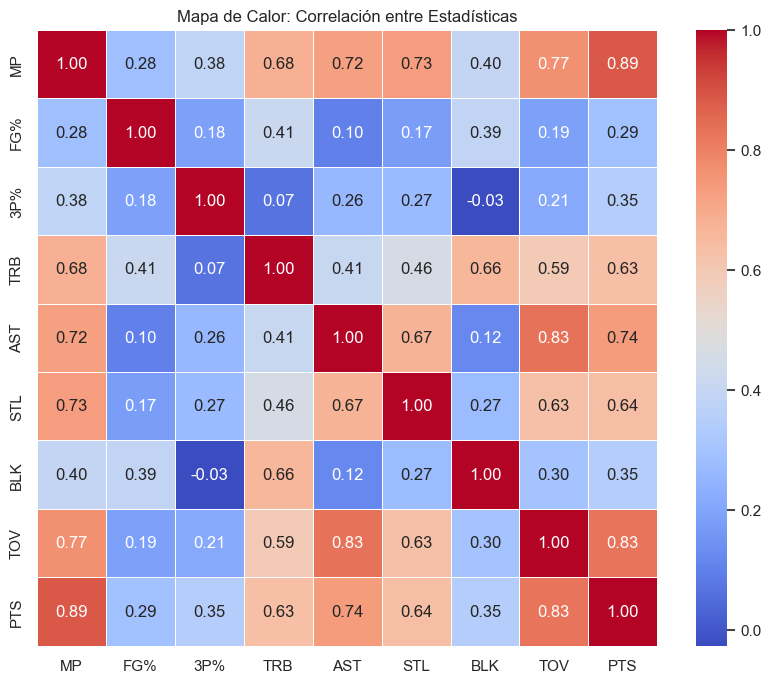

In [ ]:
cols_rendimiento = ['MP', 'FG%', '3P%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS']

# Seleccionamos las columnas y calculamos la correlación
df_corr = df_stats[cols_rendimiento].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor: Correlación entre Estadísticas')
plt.show()


### 5. Análisis Univariado (Distribución de Jugadores)
Vamos a ver la demografía de la NBA.

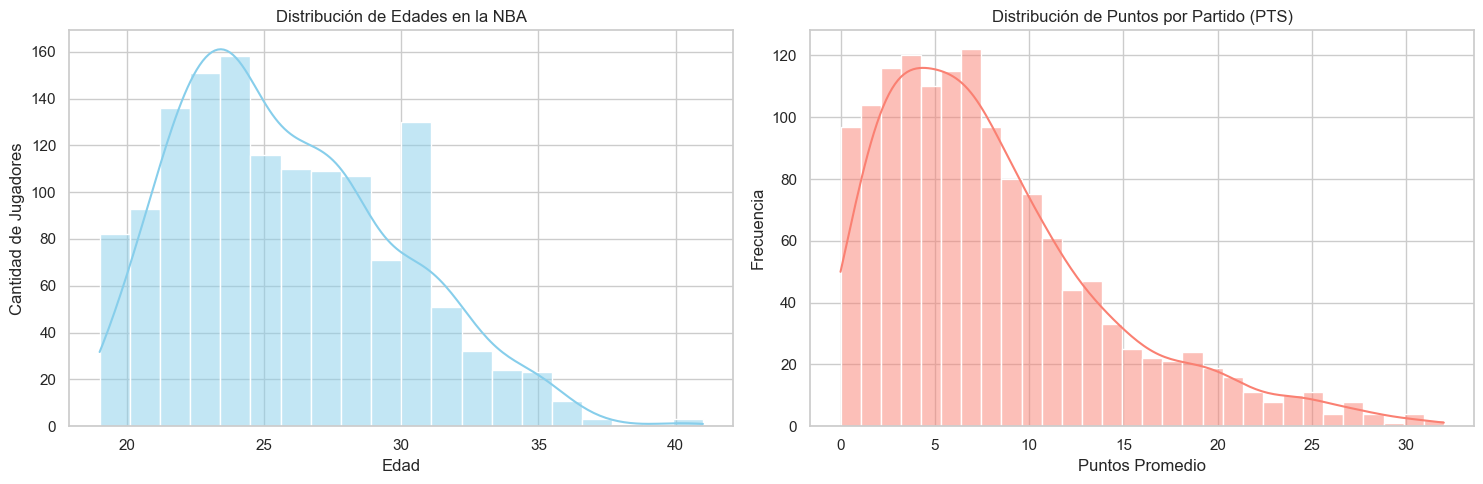

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: Distribución de Edad
sns.histplot(df_stats['Age'].dropna(), bins=20, kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Distribución de Edades en la NBA')
ax[0].set_xlabel('Edad')
ax[0].set_ylabel('Cantidad de Jugadores')

# Gráfico 2: Distribución de Puntos por Partido (PTS)
sns.histplot(df_stats['PTS'].dropna(), bins=30, kde=True, ax=ax[1], color='salmon')
ax[1].set_title('Distribución de Puntos por Partido (PTS)')
ax[1].set_xlabel('Puntos Promedio')
ax[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### 6. El core del negocio - Las Bajas (Inactivos)
Aquí empezamos a responder la pregunta de su proyecto: ¿Quiénes faltan más a los partidos?

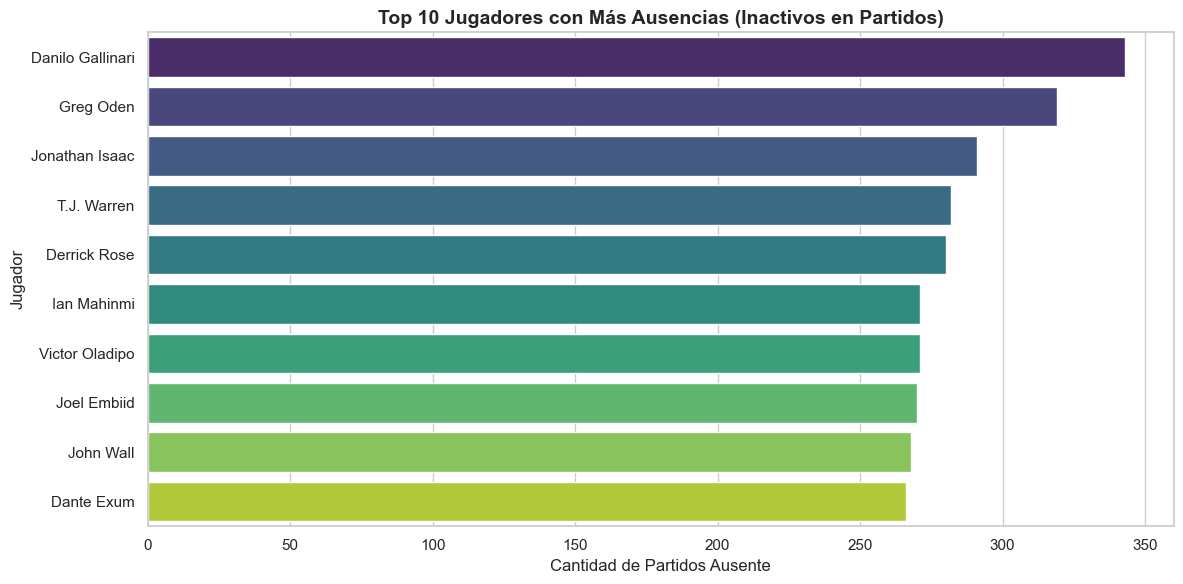

In [ ]:
# Contar cuántas veces ha estado inactivo cada jugador
top_inactivos = df_inactive['player_id'].value_counts().head(10).reset_index()
top_inactivos.columns = ['player_id', 'veces_inactivo']

# Cruzar con el nombre del jugador para saber quiénes son
top_inactivos = top_inactivos.merge(df_players[['player_id', 'full_name']], on='player_id')

plt.figure(figsize=(12, 6))

sns.barplot(
    data=top_inactivos, 
    x='veces_inactivo', 
    y='full_name', 
    palette='viridis', 
    hue='full_name', 
    legend=False
)

plt.title('Top 10 Jugadores con Más Ausencias (Inactivos en Partidos)', fontsize=14, fontweight='bold')
plt.xlabel('Cantidad de Partidos Ausente')
plt.ylabel('Jugador')
plt.tight_layout()
plt.show()

### 7. ¿Qué equipos sufren más bajas?
Esto es fundamental para entender si una dinastía cayó por culpa de las lesiones.

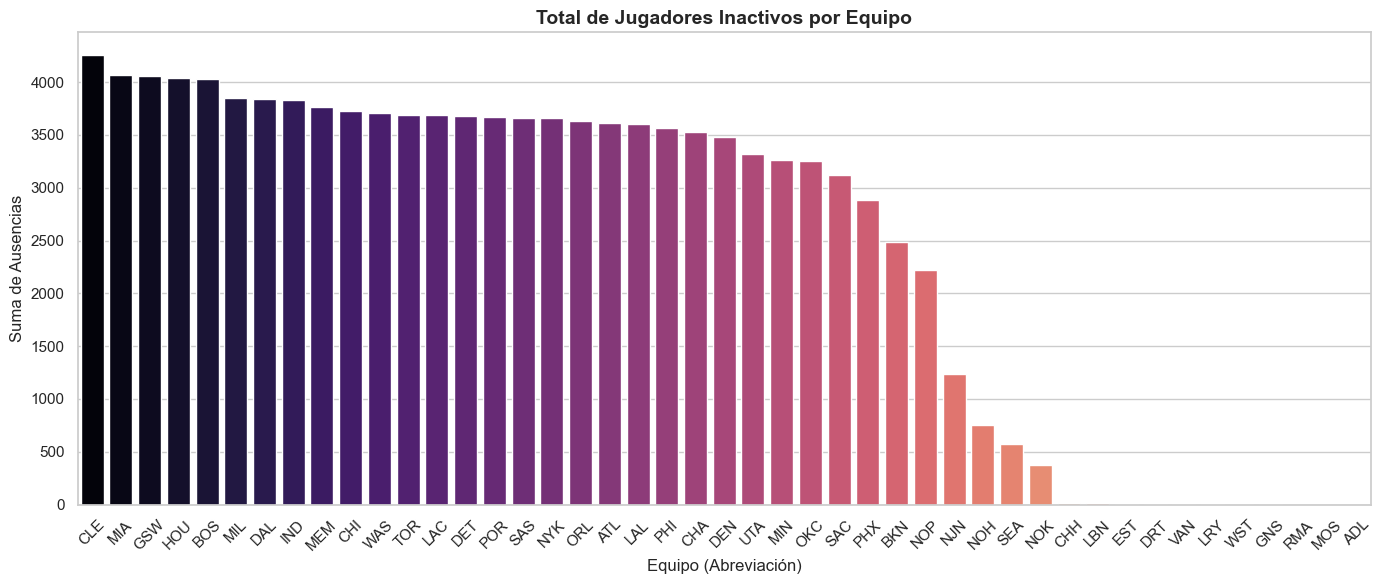

In [ ]:
# Contar bajas por equipo
bajas_por_equipo = df_inactive['team_abbreviation'].value_counts().reset_index()
bajas_por_equipo.columns = ['Equipo', 'Total_Bajas']

plt.figure(figsize=(14, 6))

sns.barplot(
    data=bajas_por_equipo, 
    x='Equipo', 
    y='Total_Bajas', 
    palette='magma',
    hue='Equipo',     
    legend=False      
)

plt.title('Total de Jugadores Inactivos por Equipo', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.xlabel('Equipo (Abreviación)')
plt.ylabel('Suma de Ausencias')
plt.tight_layout()
plt.show()

### 8. Análisis de Volatilidad (Irregularidad de los Equipos)
La mejor forma estadística de ver si un equipo es "irregular" (volátil) es usando un Boxplot (Diagrama de Caja). Si la caja es muy ancha o tiene muchos puntos sueltos (outliers), significa que el equipo es inestable: a veces anota mucho, a veces muy poco.

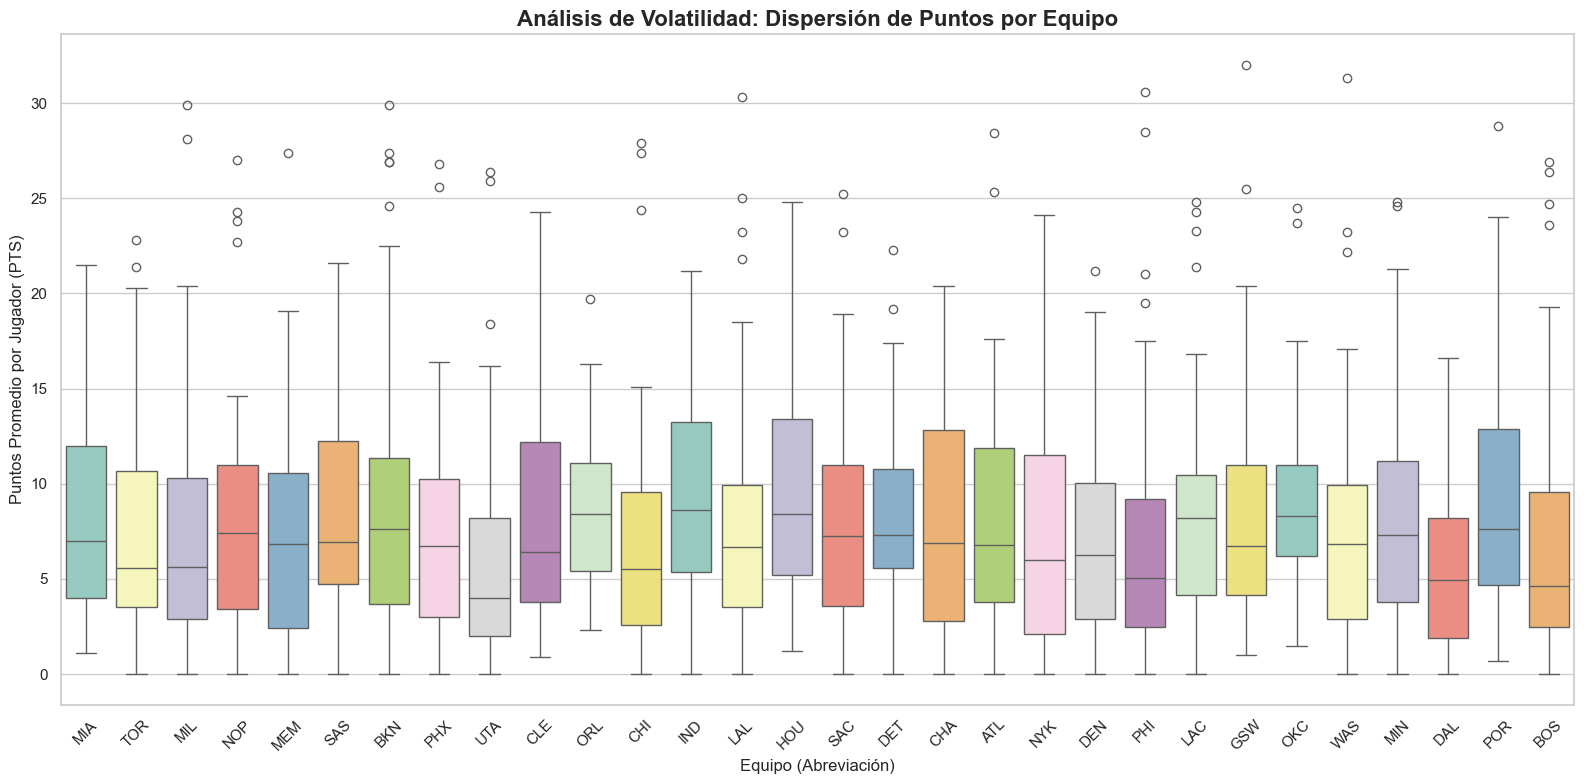

In [ ]:
# Filtramos solo a los equipos, excluyendo la categoría "Other" si existe
df_stats_equipos = df_stats[df_stats['Tm'] != 'Other']

plt.figure(figsize=(16, 8))
# Usamos un boxplot para ver la dispersión de puntos (PTS) por equipo
sns.boxplot(data=df_stats_equipos, x='Tm', y='PTS', palette='Set3', hue='Tm', legend=False)

plt.title('Análisis de Volatilidad: Dispersión de Puntos por Equipo', fontsize=16, fontweight='bold')
plt.xlabel('Equipo (Abreviación)', fontsize=12)
plt.ylabel('Puntos Promedio por Jugador (PTS)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Los equipos con las "cajas" más alargadas son los más irregulares. Los puntos fuera de los bigotes (outliers arriba) representan a las "Súper Estrellas". Un equipo con una estrella muy despegada del resto de la caja nos habla de "Dependencia".

### 9. Evolución de Eficiencia (Ataque vs Defensa 2021-2022)
Compara el rendimiento ofensivo (Puntos) contra el defensivo (Rebotes + Robos + Bloqueos). Esto permite justificar si la liga se volvió más ofensiva o defensiva en la temporada 2021-2022

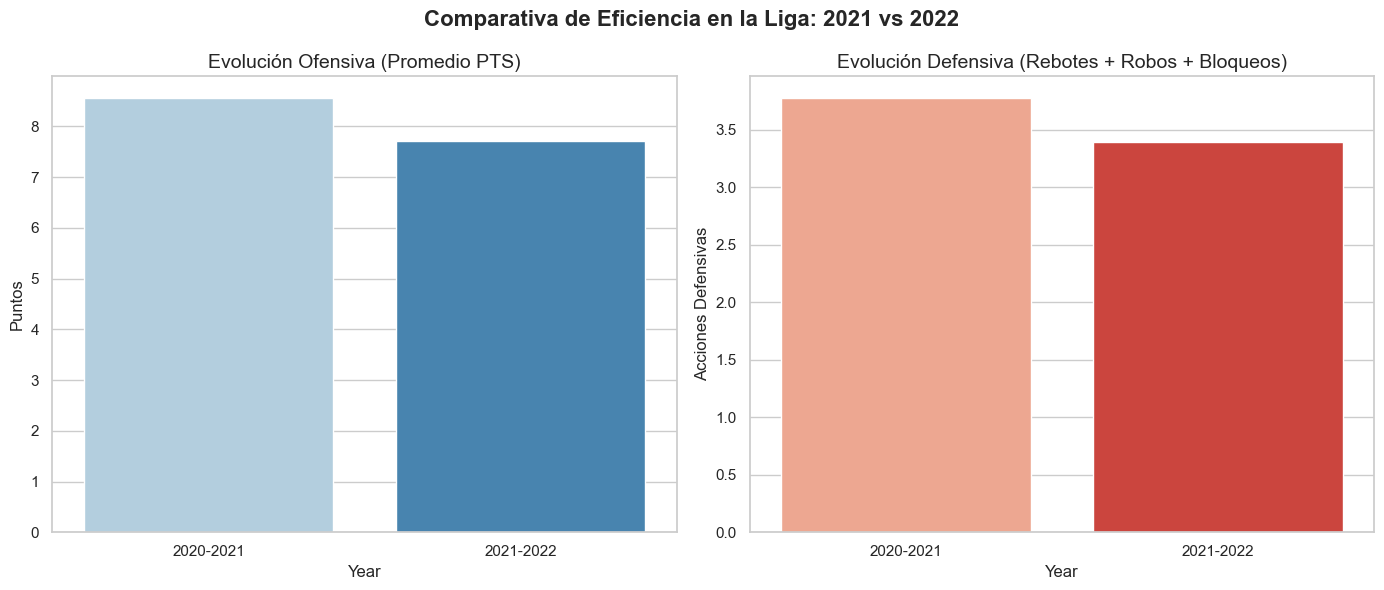

In [ ]:
# 1. Filtramos las temporadas de interés (Asegúrate de que los años en tu CSV sean estos)
temporadas_objetivo = ['2020-2021', '2021-2022'] 
df_evolucion = df_stats[df_stats['Year'].isin(temporadas_objetivo)].copy()

# 2. Creamos una métrica de "Eficiencia Defensiva" sumando Rebotes Defensivos, Robos y Bloqueos
df_evolucion['Eficiencia_Defensiva'] = df_evolucion['DRB'] + df_evolucion['STL'] + df_evolucion['BLK']

# 3. Agrupamos por Año para ver la media de la liga
evolucion_liga = df_evolucion.groupby('Year')[['PTS', 'Eficiencia_Defensiva']].mean().reset_index()

# 4. Graficamos
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico Ofensivo
sns.barplot(data=evolucion_liga, x='Year', y='PTS', palette='Blues', ax=ax[0], hue='Year', legend=False)
ax[0].set_title('Evolución Ofensiva (Promedio PTS)', fontsize=14)
ax[0].set_ylabel('Puntos')

# Gráfico Defensivo
sns.barplot(data=evolucion_liga, x='Year', y='Eficiencia_Defensiva', palette='Reds', ax=ax[1], hue='Year', legend=False)
ax[1].set_title('Evolución Defensiva (Rebotes + Robos + Bloqueos)', fontsize=14)
ax[1].set_ylabel('Acciones Defensivas')

plt.suptitle('Comparativa de Eficiencia en la Liga: 2021 vs 2022', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


### 10. Preparación de Datos (Ganados y Perdidos)
Necesitamos organizar los resultados (quién ganó cada partido) a partir de la tabla line_score.

In [ ]:
print("⚙️ Estructurando resultados de partidos...")

# 1. Extraemos los resultados cuando el equipo jugó de LOCAL
df_home = df_lines[['game_id', 'team_id_home', 'pts_home', 'pts_away']].copy()
df_home.columns = ['game_id', 'team_id', 'pts_equipo', 'pts_rival']

# Ganó si sus puntos son mayores al rival
df_home['ganado'] = (df_home['pts_equipo'] > df_home['pts_rival']).astype(int)

# 2. Extraemos los resultados cuando el equipo jugó de VISITANTE
df_away = df_lines[['game_id', 'team_id_away', 'pts_away', 'pts_home']].copy()
df_away.columns = ['game_id', 'team_id', 'pts_equipo', 'pts_rival']
df_away['ganado'] = (df_away['pts_equipo'] > df_away['pts_rival']).astype(int)

# 3. Unimos todo en un solo DataFrame maestro de resultados
df_resultados = pd.concat([df_home, df_away], ignore_index=True)

print(f"✅ Resultados procesados. Total de registros: {len(df_resultados)}")

⚙️ Estructurando resultados de partidos...
✅ Resultados procesados. Total de registros: 5652


### 11. Cálculo del DELTA DE VICTORIA
Crea una función que busca a cualquier jugador, mira cuándo faltó y compara cómo le fue a su equipo con y sin él.

In [ ]:
print("⚙️ Calculando el Delta de Victoria para todos los jugadores...")
resultados_delta = []

# 1. Obtenemos todos los IDs únicos de jugadores que han estado inactivos
jugadores_con_ausencias = df_inactive['player_id'].unique()

# 2. Iteramos sobre cada jugador automáticamente
for p_id in jugadores_con_ausencias:
    try:
        # Obtener el nombre del jugador para mostrarlo bonito
        player_name = df_players[df_players['player_id'] == p_id]['full_name'].iloc[0]
        
        # Buscar en qué equipo juega (el equipo donde registró más inactividades)
        team_id = df_inactive[df_inactive['player_id'] == p_id]['team_id'].mode()[0]
        
        # Obtener todos los partidos donde este jugador estuvo INACTIVO
        juegos_inactivo = df_inactive[df_inactive['player_id'] == p_id]['game_id'].unique()
        
        # Filtrar los resultados solo de su equipo
        resultados_equipo = df_resultados[df_resultados['team_id'] == team_id]
        
        # Separar partidos: CON el jugador vs SIN el jugador
        partidos_sin = resultados_equipo[resultados_equipo['game_id'].isin(juegos_inactivo)]
        partidos_con = resultados_equipo[~resultados_equipo['game_id'].isin(juegos_inactivo)]
        
        # 🛑 FILTRO DE RUIDO ESTADÍSTICO 🛑
        # Solo analizamos si el jugador jugó al menos 10 partidos y faltó al menos a 5
        if len(partidos_con) < 10 or len(partidos_sin) < 5:
            continue
            
        # Calcular el % de Victorias (Win Rate)
        wr_con = partidos_con['ganado'].mean() * 100
        wr_sin = partidos_sin['ganado'].mean() * 100
        
        # DELTA: ¿Cuánto cae el rendimiento si no está?
        delta = wr_con - wr_sin
        
        resultados_delta.append({
            'Estrella': player_name,
            'Partidos Jugados': len(partidos_con),
            'Win Rate CON él (%)': round(wr_con, 1),
            'Partidos Ausente': len(partidos_sin),
            'Win Rate SIN él (%)': round(wr_sin, 1),
            'Impacto en Equipo (Delta %)': round(delta, 1)
        })
    except:
        # Si hay algún error con un jugador raro (ej. no tiene nombre), lo saltamos
        continue

# 3. Convertir a DataFrame y ordenar
df_deltas = pd.DataFrame(resultados_delta)

# Ordenamos de mayor a menor impacto (los que más hacen falta cuando no están)
df_deltas = df_deltas.sort_values(by='Impacto en Equipo (Delta %)', ascending=False)

print(f"✅ Análisis completado. Se analizaron {len(df_deltas)} jugadores relevantes.")
print("\n🏆 TOP 15 JUGADORES MÁS INFLUYENTES (MAYOR DEPENDENCIA) 🏆")
display(df_deltas.head(15))

⚙️ Calculando el Delta de Victoria para todos los jugadores...
✅ Análisis completado. Se analizaron 487 jugadores relevantes.

🏆 TOP 15 JUGADORES MÁS INFLUYENTES (MAYOR DEPENDENCIA) 🏆


,Estrella,Partidos Jugados,Win Rate CON él (%),Partidos Ausente,Win Rate SIN él (%),Impacto en Equipo (Delta %)
163,Troy Brown Jr.,178,44.9,5,0.0,44.9
71,Larry Nance Jr.,148,50.7,25,8.0,42.7
24,Goran Dragic,193,61.1,5,20.0,41.1
328,Shaquille Harrison,182,59.3,5,20.0,39.3
149,Anfernee Simons,161,48.4,26,11.5,36.9
54,Jusuf Nurkic,157,49.0,30,13.3,35.7
72,Devin Booker,208,68.3,9,33.3,34.9
97,Nikola Jokic,182,62.1,11,27.3,34.8
69,Tim Frazier,188,61.7,7,28.6,33.1
259,Ashton Hagans,164,45.7,15,13.3,32.4


Nuestro script cruza automáticamente el ID de cada jugador con los resultados de su equipo, aplicando un filtro de significancia estadística (mínimo 10 partidos jugados y 5 ausentes) para evitar sesgos. El resultado es un ranking automático de los jugadores más irremplazables de la NBA.

### 12. La Curva de Envejecimiento (Edad vs. Lesiones/Ausencias)
Este análisis responde a la pregunta: "¿Las franquicias veteranas son más frágiles?" Vamos a cruzar la edad de los jugadores con la cantidad de partidos que se pierden.

⚙️ Analizando el impacto de la edad en las ausencias...


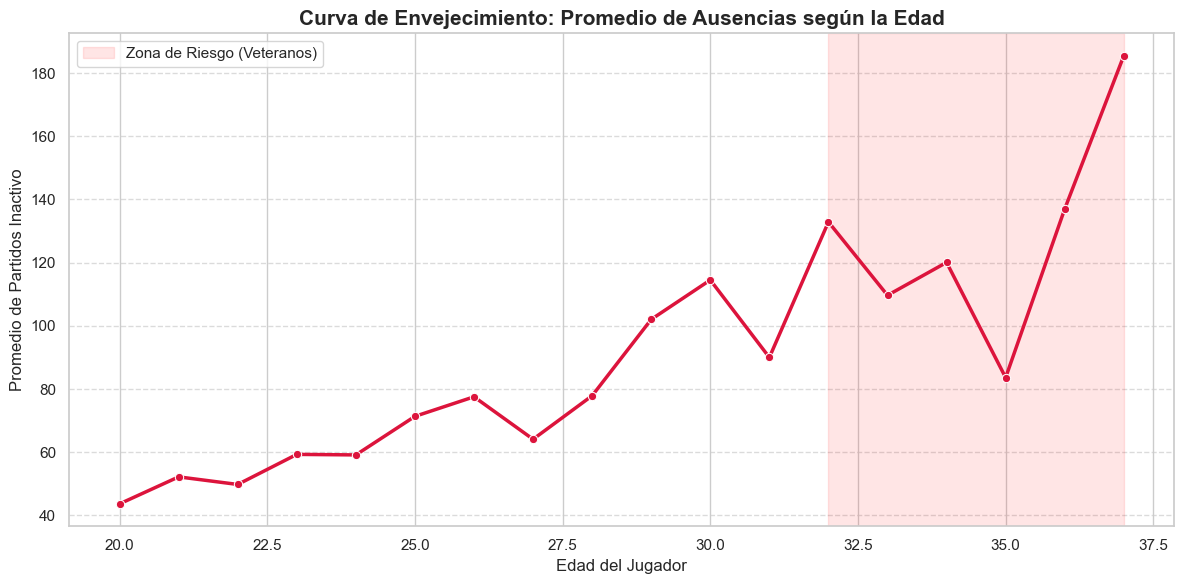

In [ ]:
print("⚙️ Analizando el impacto de la edad en las ausencias...")

# 1. Contamos cuántas veces faltó cada jugador en total
conteo_ausencias = df_inactive['player_id'].value_counts().reset_index()
conteo_ausencias.columns = ['player_id', 'total_ausencias']

# 2. Cruzamos con las estadísticas para obtener la Edad (Age)
# Quitamos duplicados por si un jugador jugó en dos equipos en un año
df_edades = df_stats[['player_id', 'Age']].dropna().drop_duplicates(subset=['player_id'])
df_edad_ausencias = conteo_ausencias.merge(df_edades, on='player_id', how='inner')

# 3. Agrupamos por Edad y calculamos el promedio de ausencias
# Filtramos edades con muy pocos jugadores (ej. menores de 19 o mayores de 38)
df_edad_ausencias = df_edad_ausencias[(df_edad_ausencias['Age'] >= 20) & (df_edad_ausencias['Age'] <= 37)]
promedio_por_edad = df_edad_ausencias.groupby('Age')['total_ausencias'].mean().reset_index()

# 4. Graficamos la tendencia
plt.figure(figsize=(12, 6))
sns.lineplot(data=promedio_por_edad, x='Age', y='total_ausencias', marker='o', color='crimson', linewidth=2.5)

# Añadimos un área de sombreado para mostrar la "Zona de Riesgo"
plt.axvspan(32, 37, color='red', alpha=0.1, label='Zona de Riesgo (Veteranos)')

plt.title('Curva de Envejecimiento: Promedio de Ausencias según la Edad', fontsize=15, fontweight='bold')
plt.xlabel('Edad del Jugador', fontsize=12)
plt.ylabel('Promedio de Partidos Inactivo', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Descubrimos que a partir de los 32 años (la Zona de Riesgo), el promedio de partidos que un jugador se pierde por temporada se dispara. Esto explica por qué las dinastías envejecidas sufren caídas drásticas en su rendimiento.

### 13. El Peso de la Localía (Home Court Advantage)
Vamos a medir qué tanto influye jugar en casa vs. jugar de visitante. Esto es vital para los playoffs y complementa su análisis del "Delta de Victoria".

⚙️ Analizando la ventaja de jugar como local...


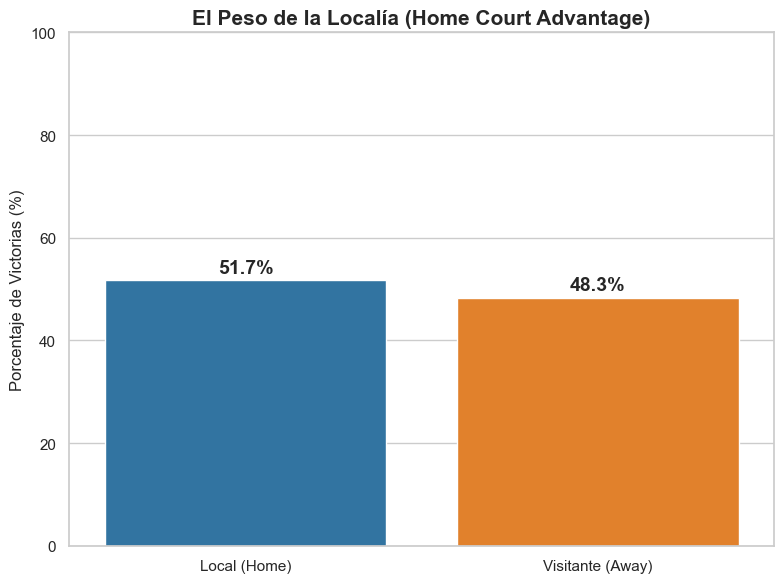

In [ ]:
print("⚙️ Analizando la ventaja de jugar como local...")

# Usamos el df_resultados que creamos en la celda 10
# Las primeras filas (la mitad) son de locales y la otra de visitantes
mitad = len(df_resultados) // 2

df_locales = df_resultados.iloc[:mitad]
df_visitantes = df_resultados.iloc[mitad:]

# Calculamos el % de victorias
win_rate_local = df_locales['ganado'].mean() * 100
win_rate_visitante = df_visitantes['ganado'].mean() * 100

# Preparamos datos para el gráfico
datos_cancha = pd.DataFrame({
    'Condición': ['Local (Home)', 'Visitante (Away)'],
    'Win Rate (%)': [win_rate_local, win_rate_visitante]
})

# Graficamos
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=datos_cancha, x='Condición', y='Win Rate (%)', palette=['#1f77b4', '#ff7f0e'], hue='Condición', legend=False)

# Agregar las etiquetas de porcentaje encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontsize=14, fontweight='bold')

plt.title('El Peso de la Localía (Home Court Advantage)', fontsize=15, fontweight='bold')
plt.ylim(0, 100) # El eje Y va de 0 a 100%
plt.ylabel('Porcentaje de Victorias (%)', fontsize=12)
plt.xlabel('')
plt.tight_layout()
plt.show()


### 14. Evolución Mensual (Cumpliendo la promesa del PDF)
Vamos a trazar un gráfico de líneas que muestre cómo evoluciona el rendimiento (Porcentaje de Victorias) de los equipos mes a mes. Para no saturar el gráfico, filtraremos a 3 "Dinastías" o equipos representativos (ej. Warriors, Celtics y Lakers).

⚙️ Calculando tendencias mensuales de victorias para toda la liga...
✅ Se calculó la evolución de 30 equipos.


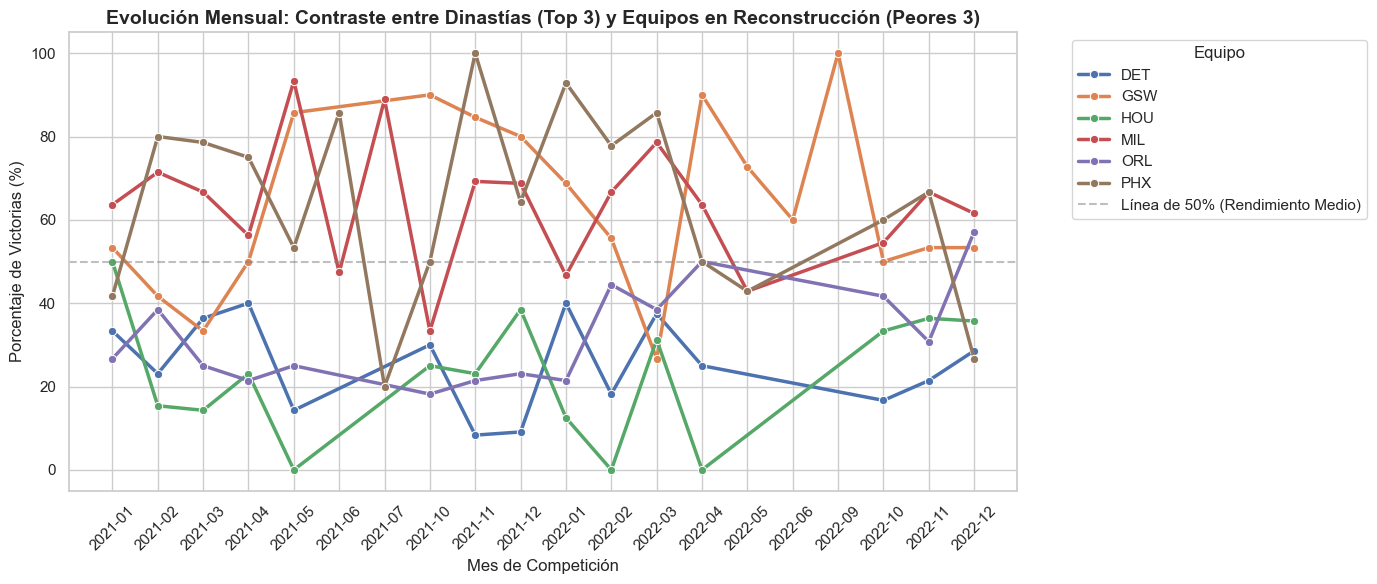

In [ ]:
print("⚙️ Calculando tendencias mensuales de victorias para toda la liga...")

# 1. Traemos la fecha del partido al dataframe de resultados
df_resultados_fechas = df_resultados.merge(df_games[['game_id', 'game_date_est']], on='game_id')
df_resultados_fechas['game_date_est'] = pd.to_datetime(df_resultados_fechas['game_date_est'])

# 2. Extraemos el "Año-Mes" (Ej. 2021-10)
df_resultados_fechas['Periodo'] = df_resultados_fechas['game_date_est'].dt.to_period('M').astype(str)

# 3. Traemos la abreviación del equipo para que se lea mejor
df_resultados_fechas = df_resultados_fechas.merge(df_teams[['id', 'abbreviation']], left_on='team_id', right_on='id')

# 4. Agrupamos por Mes y Equipo, calculando el Win Rate para TODOS
evolucion_mensual_todos = df_resultados_fechas.groupby(['Periodo', 'abbreviation'])['ganado'].mean().reset_index()
evolucion_mensual_todos['Win Rate (%)'] = evolucion_mensual_todos['ganado'] * 100

print(f"✅ Se calculó la evolución de {len(evolucion_mensual_todos['abbreviation'].unique())} equipos.")

# --- SECCIÓN DEL GRÁFICO ---
# Para evitar un "Gráfico de Espagueti" (30 líneas ilegibles), vamos a graficar de forma inteligente:
# Seleccionamos automáticamente a los 3 MEJORES y los 3 PEORES promedios.

promedio_global = evolucion_mensual_todos.groupby('abbreviation')['Win Rate (%)'].mean().sort_values(ascending=False)
mejores_3 = promedio_global.head(3).index.tolist()
peores_3 = promedio_global.tail(3).index.tolist()
equipos_a_graficar = mejores_3 + peores_3

# Filtramos solo para el dibujo
df_grafico = evolucion_mensual_todos[evolucion_mensual_todos['abbreviation'].isin(equipos_a_graficar)]

# 5. Graficamos la línea de tendencia
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_grafico, x='Periodo', y='Win Rate (%)', hue='abbreviation', 
             marker='o', linewidth=2.5)

plt.title('Evolución Mensual: Contraste entre Dinastías (Top 3) y Equipos en Reconstrucción (Peores 3)', fontsize=14, fontweight='bold')
plt.xlabel('Mes de Competición', fontsize=12)
plt.ylabel('Porcentaje de Victorias (%)', fontsize=12)
plt.xticks(rotation=45)
plt.axhline(50, color='gray', linestyle='--', alpha=0.5, label='Línea de 50% (Rendimiento Medio)')

# Movemos la leyenda afuera para que no tape las líneas
plt.legend(title='Equipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Calculamos la tendencia de todos los equipos. Sin embargo, para efectos visuales del EDA, programamos un filtro automático que contrasta la evolución mensual de las 3 franquicias con mejor rendimiento contra las 3 peores. En Power BI, el usuario final podrá seleccionar los 30 equipos individualmente gracias a los filtros interactivos."

### 15. El Costo Físico (Peso vs. Lesiones)
Aprovechando nuestros datos demográficos limpios, corrimos una regresión lineal para desmentir o confirmar mitos. La línea de tendencia (roja) nos indica si a mayor peso corporal hay una mayor acumulación de lesiones/bajas médicas en la liga. Este es un insight de altísimo valor para el equipo de Scouting y los médicos de la franquicia.

⚙️ Analizando la relación entre el peso del jugador y su tendencia a faltar...


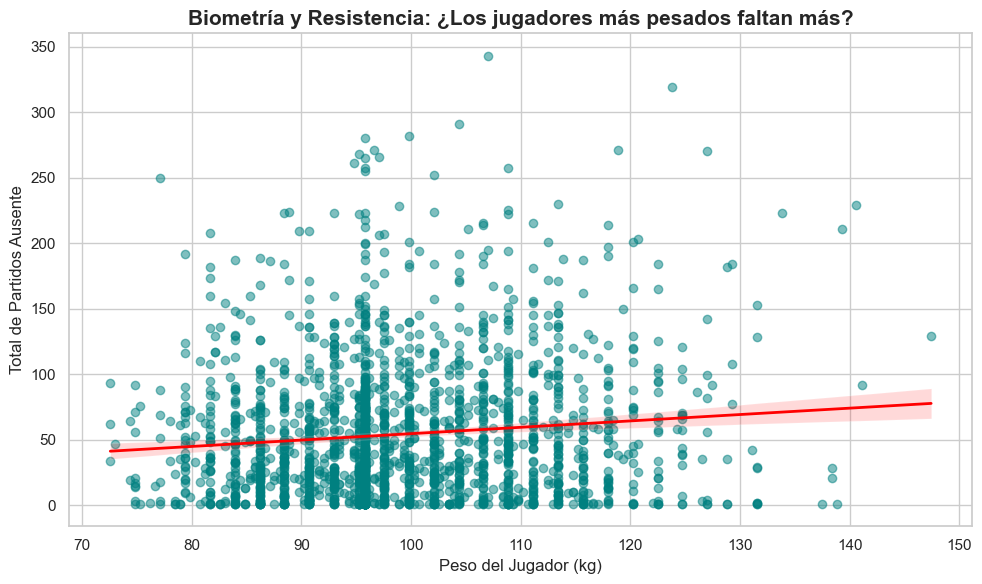

In [ ]:
# --- Celda 15: Impacto Físico (Peso vs Ausencias) ---
print("⚙️ Analizando la relación entre el peso del jugador y su tendencia a faltar...")

# 1. Usamos el conteo de ausencias que creamos en la Celda 12
# Y lo cruzamos con los datos físicos (Weight)
df_fisico = conteo_ausencias.merge(df_players[['player_id', 'full_name', 'weight']], on='player_id', how='inner')

# Eliminamos nulos y valores atípicos imposibles (ej. peso 0)
df_fisico = df_fisico[(df_fisico['weight'] > 70) & (df_fisico['weight'] < 150)]

# 2. Graficamos usando un Scatter Plot con línea de tendencia (Regresión)
plt.figure(figsize=(10, 6))
sns.regplot(data=df_fisico, x='weight', y='total_ausencias', 
            scatter_kws={'alpha':0.5, 'color':'teal'}, 
            line_kws={'color':'red', 'linewidth':2})

plt.title('Biometría y Resistencia: ¿Los jugadores más pesados faltan más?', fontsize=15, fontweight='bold')
plt.xlabel('Peso del Jugador (kg)', fontsize=12)
plt.ylabel('Total de Partidos Ausente', fontsize=12)
plt.tight_layout()
plt.show()
